
# Projet 2

In [293]:
# import des modules usuels
import numpy as np
import pandas as pd

# options d'affichage
pd.set_option("display.min_rows", 16)

In [294]:
# chargement et traitement des données
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                   index_col="Code INSEE")
geo = geo.sort_index()
geo[['Latitude', 'Longitude']] = geo["geo_point_2d"].str.extract("(.*), (.*)").astype(float)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude
Code INSEE,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320


**Projet maison n° 1**

- Ajoutez une colonne 'CP Ville' avec le Code postal + un espace + et le nom de la Ville.
- Ecrivez une fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.
- Ajoutez une fonction de conversion pour pouvoir utiliser la première fonction avec un GPS (degrés, minutes, secondes).

In [295]:
geo['CP Ville']= geo['Code Postal']+' '+geo['Commune']

In [296]:
# fonction recherche de ville
def ville(lat, long):
    from numpy import cos,sin,arccos,pi
    r=6371
    lat_r=lat*pi/180
    long_r=long*pi/180
    dist=r*arccos(cos(lat_r)*cos(geo['Latitude']*pi/180)*cos(geo['Longitude']*pi/180-long_r)+sin(lat_r)*sin(geo['Latitude']*pi/180))
    geo['Distance']=arccos(cos(lat_r)*cos(geo['Latitude']*pi/180)*cos(geo['Longitude']*pi/180-long_r)+sin(lat_r)*sin(geo['Latitude']*pi/180))
    return geo.loc[geo['Distance'].idxmin(),'Commune']

In [297]:
# on applique la fonction à une coordonnée tirée au hasard
np.random.seed(0)
a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
lat = (b - a) * np.random.random() + a
a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
long = (b - a) * np.random.random() + a

ville(lat, long)

'BOSJEAN'

In [298]:
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,CP Ville,Distance
Code INSEE,,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114,01400 L'ABERGEMENT-CLEMENCIAT,0.011843
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017,01640 L'ABERGEMENT-DE-VAREY,0.013295
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926,01500 AMBERIEU-EN-BUGEY,0.014103
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273,01330 AMBERIEUX-EN-DOMBES,0.014439
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320,01300 AMBLEON,0.018046


In [299]:
# conversion degrés, minutes, secondes => décimal
def dms2dec(deg, mn, sec):
    conv=deg+(mn+sec/60)/60
    return conv

In [300]:
# à partir de coordonnées GPS précises
ville(dms2dec(48, 42, 52), dms2dec(2, 14, 45))

'PALAISEAU'

**Projet maison n° 2**

La colonne "geo_shape" comporte des chaines de catactères au format JSON. Elles représentent les formes géométriques des communes qui sont soit des polygones soit composées de plusieurs polygones.

- Utiliser la librairie Python json pour parser la colonne "geo_shape".
- Donner le décompte des valeurs accédées avec la clé "type".
- Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
- Quelle commune est la plus complexe géométriquement ?
- Quelle commune est la seconde la plus complexe géométriquement ?
- Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [301]:
import json
geo['Type']=geo['geo_shape'].apply(lambda x: (json.loads(x)['type']))
geo['Coordinates']=geo['geo_shape'].apply(lambda x: (json.loads(x)['coordinates']))
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,CP Ville,Distance,Type,Coordinates
Code INSEE,,,,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114,01400 L'ABERGEMENT-CLEMENCIAT,0.054758,Polygon,"[[[4.92627342692396, 46.1200517234555], [4.921..."
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017,01640 L'ABERGEMENT-DE-VAREY,0.060359,Polygon,"[[[5.430089291292173, 45.98275997279625], [5.4..."
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926,01500 AMBERIEU-EN-BUGEY,0.060633,Polygon,"[[[5.386190824025674, 45.930927620632], [5.374..."
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273,01330 AMBERIEUX-EN-DOMBES,0.056955,Polygon,"[[[4.895580369408855, 45.97991618124606], [4.8..."
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320,01300 AMBLEON,0.065199,Polygon,"[[[5.614854625053272, 45.734638855121595], [5...."


In [302]:
geo['geo_shape'].apply(lambda x: (json.loads(x)['type'])).value_counts()

Polygon         36670
MultiPolygon       72
Name: geo_shape, dtype: int64

In [303]:
s_coord=geo['geo_shape'].apply(lambda x: (json.loads(x)['coordinates']))
s_coord.apply(lambda x: (len(x))).value_counts()


1    36660
2       80
4        1
3        1
Name: geo_shape, dtype: int64

In [304]:
geo['Nb']=geo['geo_shape'].apply(lambda x: (json.loads(x)['coordinates'])).apply(lambda x: (len(x)))
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,CP Ville,Distance,Type,Coordinates,Nb
Code INSEE,,,,,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114,01400 L'ABERGEMENT-CLEMENCIAT,0.054758,Polygon,"[[[4.92627342692396, 46.1200517234555], [4.921...",1
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017,01640 L'ABERGEMENT-DE-VAREY,0.060359,Polygon,"[[[5.430089291292173, 45.98275997279625], [5.4...",1
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926,01500 AMBERIEU-EN-BUGEY,0.060633,Polygon,"[[[5.386190824025674, 45.930927620632], [5.374...",1
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273,01330 AMBERIEUX-EN-DOMBES,0.056955,Polygon,"[[[4.895580369408855, 45.97991618124606], [4.8...",1
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320,01300 AMBLEON,0.065199,Polygon,"[[[5.614854625053272, 45.734638855121595], [5....",1


In [305]:
geo.loc[s_coord.apply(lambda x: (len(x))).idxmax(),'Commune']

'HYERES'

In [306]:
geo['Commune'].loc[geo['Coordinates'].str.len().sort_values().index[-1]]
geo['Commune'].loc[geo['Coordinates'].str.len().sort_values().index[-2]]

'VAL-DE-REUIL'

In [307]:
geo.loc[(geo['Type']=='Polygon') & (geo['Coordinates'].str.len()==2),'Commune']

Code INSEE
02232               COYOLLES
05052               EYGLIERS
09042    LA BASTIDE-DE-SEROU
22209              PLOUBALAY
2A272                SARTENE
2B049              CALENZANA
48080               LANGOGNE
67486              SUNDHOUSE
68078              EGUISHEIM
71028            BEAUVERNOIS
Name: Commune, dtype: object

In [308]:
geo.loc[(geo['Type']=='Polygon') & (geo['Coordinates'].str.len()==2)]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,CP Ville,Distance,Type,Coordinates,Nb
Code INSEE,,,,,,,,,,,,,,,,,
02232,02600,COYOLLES,AISNE,PICARDIE,Commune simple,126.0,2489.0,0.4,"49.2133089693, 3.01306173751","{""type"": ""Polygon"", ""coordinates"": [[[3.037897...",49.213309,3.013062,02600 COYOLLES,0.012373,Polygon,"[[[3.037897560658703, 49.16921270775551], [3.0...",2
05052,05600,EYGLIERS,HAUTES-ALPES,PROVENCE-ALPES-COTE D'AZUR,Commune simple,1615.0,2987.0,0.7,"44.6925244966, 6.66688741371","{""type"": ""Polygon"", ""coordinates"": [[[6.719912...",44.692524,6.666887,05600 EYGLIERS,0.087873,Polygon,"[[[6.719912606601575, 44.70392733592357], [6.7...",2
09042,09240,LA BASTIDE-DE-SEROU,ARIEGE,MIDI-PYRENEES,Chef-lieu canton,479.0,4138.0,1.0,"43.0242795037, 1.42677885373","{""type"": ""Polygon"", ""coordinates"": [[[1.423960...",43.024280,1.426779,09240 LA BASTIDE-DE-SEROU,0.099808,Polygon,"[[[1.423960819701936, 42.99550854650971], [1.4...",2
22209,22650,PLOUBALAY,COTES-D'ARMOR,BRETAGNE,Chef-lieu canton,36.0,3600.0,2.7,"48.5596688192, -2.12838362694","{""type"": ""Polygon"", ""coordinates"": [[[-2.11237...",48.559669,-2.128384,22650 PLOUBALAY,0.050516,Polygon,"[[[-2.11237709725211, 48.52896113651634], [-2....",2
2A272,20100,SARTENE,CORSE-DU-SUD,CORSE,Sous-préfecture,190.0,20182.0,3.1,"41.5718443328, 8.93538107497","{""type"": ""Polygon"", ""coordinates"": [[[8.940487...",41.571844,8.935381,20100 SARTENE,0.149275,Polygon,"[[[8.940487655060174, 41.490088793265336], [8....",2
2B049,20214,CALENZANA,HAUTE-CORSE,CORSE,Chef-lieu canton,596.0,18465.0,2.1,"42.4784267166, 8.80369225001","{""type"": ""Polygon"", ""coordinates"": [[[8.911220...",42.478427,8.803692,20214 CALENZANA,0.135018,Polygon,"[[[8.911220447280732, 42.41019895400797], [8.8...",2
48080,48300,LANGOGNE,LOZERE,LANGUEDOC-ROUSSILLON,Chef-lieu canton,973.0,3124.0,3.1,"44.7237405653, 3.83363110341","{""type"": ""Polygon"", ""coordinates"": [[[3.850531...",44.723741,3.833631,48300 LANGOGNE,0.072191,Polygon,"[[[3.850531831651621, 44.68745054452225], [3.8...",2
67486,67920,SUNDHOUSE,BAS-RHIN,ALSACE,Commune simple,166.0,1590.0,1.5,"48.2550723499, 7.63031906582","{""type"": ""Polygon"", ""coordinates"": [[[7.594939...",48.255072,7.630319,67920 SUNDHOUSE,0.062790,Polygon,"[[[7.594939251325704, 48.23228567615893], [7.5...",2
68078,68420,EGUISHEIM,HAUT-RHIN,ALSACE,Commune simple,320.0,1400.0,1.6,"48.0371183049, 7.30052876111","{""type"": ""Polygon"", ""coordinates"": [[[7.281156...",48.037118,7.300529,68420 EGUISHEIM,0.059769,Polygon,"[[[7.281156117554148, 48.02598189605906], [7.2...",2


In [310]:
conda install shapely

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [391]:
from shapely.geometry import Point, Polygon, MultiPolygon

In [392]:
ind=geo.loc[(geo['Type']=='Polygon') & (geo['Coordinates'].str.len()==2)].index

In [399]:
res=[]
for i in range(len(ind)):
    res.append(Polygon(geo.loc[ind[i],'Coordinates'][0]).contains(Polygon(geo.loc[ind[i],'Coordinates'][1])))
res

[True, True, True, True, True, True, True, True, True, True]

In [405]:
poly0=Polygon(geo.loc[ind[9],'Coordinates'][0])

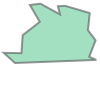

In [406]:
poly0

In [407]:
poly1=Polygon(geo.loc[ind[9],'Coordinates'][1])

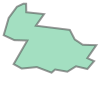

In [408]:
poly1